In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda,MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D,MaxPool2D,MaxPooling2D,AvgPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = "../input/kermany2018/OCT2017 /train"
test_dir = "../input/kermany2018/OCT2017 /test"

In [3]:
for dirpath, dirname, filenames in os.walk("../input/kermany2018/OCT2017 "):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 3 directories and there are 0 images in ../input/kermany2018/OCT2017 
There are 4 directories and there are 0 images in ../input/kermany2018/OCT2017 /val
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/DRUSEN
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/CNV
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/NORMAL
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/DME
There are 4 directories and there are 0 images in ../input/kermany2018/OCT2017 /test
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/DRUSEN
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/CNV
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/NORMAL
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/DME
There are 4 directories

In [4]:
!mkdir "dataset"
!mkdir "dataset/train"
!mkdir "dataset/test"
!mkdir "dataset/train/CNV"
!mkdir "dataset/train/DRUSEN"
!mkdir "dataset/train/DME"
!mkdir "dataset/train/NORMAL"
!mkdir "dataset/test/CNV"
!mkdir "dataset/test/DRUSEN"
!mkdir "dataset/test/DME"
!mkdir "dataset/test/NORMAL"

In [5]:
import shutil
for folder in os.listdir(train_dir):
    for file in os.listdir(train_dir + '/' + folder):
        if folder == "CNV":
            if len(os.listdir("dataset/train/CNV")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/CNV")
            else:
                break
        elif folder == "DRUSEN":
            if len(os.listdir("dataset/train/DRUSEN")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DRUSEN")
            else:
                break
        elif folder == "DME":
            if len(os.listdir("dataset/train/DME")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DME")
            else:
                break
        elif folder == "NORMAL":
            if len(os.listdir("dataset/train/NORMAL")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/NORMAL")
            else:
                break

In [6]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 0 images in dataset/test/CNV
There are 0 directories and there are 0 images in dataset/test/NORMAL
There are 0 directories and there are 0 images in dataset/test/DME
There are 0 directories and there are 0 images in dataset/test/DRUSEN
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/DME
There are 0 directories and there are 5000 images in dataset/train/DRUSEN


In [7]:
for folder in os.listdir(train_dir):
    for file in os.listdir(train_dir + '/' + folder)[5000:8000]:
        if folder == "CNV":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/CNV")
        elif folder == "DRUSEN":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/DRUSEN")
        elif folder == "DME":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/DME")
        elif folder == "NORMAL":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/NORMAL")

In [8]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 3000 images in dataset/test/CNV
There are 0 directories and there are 3000 images in dataset/test/NORMAL
There are 0 directories and there are 3000 images in dataset/test/DME
There are 0 directories and there are 3000 images in dataset/test/DRUSEN
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/DME
There are 0 directories and there are 5000 images in dataset/train/DRUSEN


In [9]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/train",
                                                                image_size = (224, 224),
                                                                label_mode = "categorical",
                                                                shuffle = True)
test_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/test",
                                                                image_size = (224, 224),
                                                                label_mode = "categorical",
                                                                shuffle = False)
train_data, test_data

Found 20000 files belonging to 4 classes.


2021-12-27 15:06:23.996189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 15:06:24.092426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 15:06:24.093185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 15:06:24.095701: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 12000 files belonging to 4 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [10]:
train_dataset = train_data.prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [11]:
tf.random.set_seed(42)

In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [14]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [15]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy",sensitivity,specificity])

model_history = model.fit(train_dataset,
                         epochs = 15,
                         validation_data = test_dataset,callbacks = [lr_callback])

Epoch 1/15


2021-12-27 15:06:28.359320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-27 15:06:29.827328: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


625/625 [==============================] - 176s 263ms/step - loss: 1.2015 - accuracy: 0.4162 - sensitivity: 0.1715 - specificity: 0.9748 - val_loss: 0.8794 - val_accuracy: 0.6402 - val_sensitivity: 0.4735 - val_specificity: 0.9411
Epoch 2/15
625/625 [==============================] - 165s 263ms/step - loss: 0.6437 - accuracy: 0.7557 - sensitivity: 0.6938 - specificity: 0.9430 - val_loss: 0.4939 - val_accuracy: 0.8192 - val_sensitivity: 0.8013 - val_specificity: 0.9482
Epoch 3/15
625/625 [==============================] - 164s 262ms/step - loss: 0.3903 - accuracy: 0.8626 - sensitivity: 0.8501 - specificity: 0.9593 - val_loss: 0.3409 - val_accuracy: 0.8800 - val_sensitivity: 0.8748 - val_specificity: 0.9622
Epoch 4/15
625/625 [==============================] - 164s 262ms/step - loss: 0.2609 - accuracy: 0.9112 - sensitivity: 0.9065 - specificity: 0.9724 - val_loss: 0.2504 - val_accuracy: 0.9212 - val_sensitivity: 0.9188 - val_specificity: 0.9749
Epoch 5/15
625/625 [=======================

In [17]:
history = model.history.history
def plot_metrics(history):
  
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_sensitivity = history['sensitivity']
    train_specificity = history['specificity']
    val_sensitivity = history['val_sensitivity']
    val_specificity = history['val_specificity']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # sensitivity
    plt.figure()
    plt.plot(train_sensitivity, label='Training sensitivity')
    plt.plot( val_sensitivity, label='Validation sensitivity')
    plt.title('sensitivity')
    plt.ylabel('sensitivity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
     # specificity
    plt.figure()
    plt.plot(train_specificity, label='Training specificity')
    plt.plot(val_specificity, label='Validation specificity')
    plt.title('specificity')
    plt.ylabel('specificity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

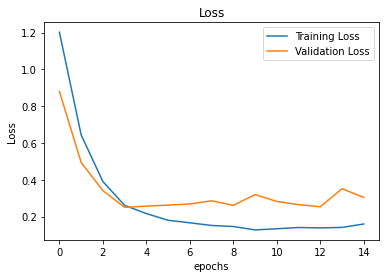

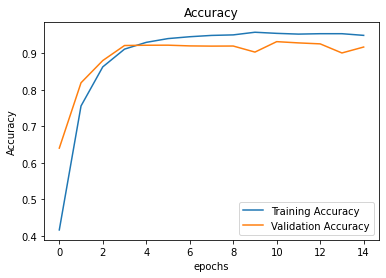

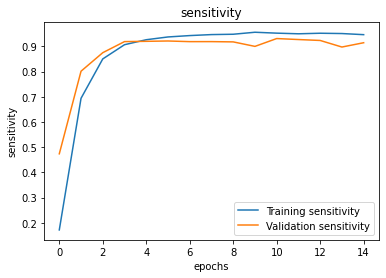

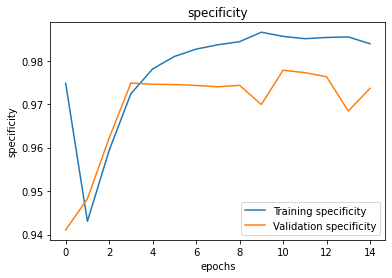

In [18]:
plot_metrics(history)

In [19]:
# serialize model to JSON
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_in_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model2=model_from_json(loaded_model_json)
model2.summary()

2021-12-27 15:54:26.774005: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.


Saved model to disk


2021-12-27 15:54:28.714636: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.


Loaded model from disk
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (Non

In [20]:
pred_probs = model.predict(test_data, verbose=1)
pred_probs[0], pred_probs[0].argmax

375/375 [==============================] - 24s 64ms/step


(array([9.9898344e-01, 6.2188528e-06, 1.0102382e-03, 5.0361855e-08],
       dtype=float32),
 <function ndarray.argmax>)

In [21]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
    y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

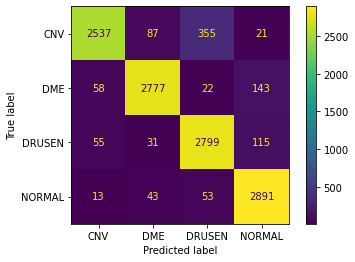

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_labels, pred_classes, labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = train_data.class_names)
disp.plot()

In [24]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  #"""Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel)."""
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  #img = img/255.
  return img

In [25]:
class_names = train_data.class_names
print(class_names)

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [26]:
import matplotlib.image as mpimg
def pred_and_plot(model, filename, actual_class,  class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred, tf.argmax(pred, axis = 1))
  # Get the predicted class
  pred_class = class_names[tf.argmax(pred, axis = 1).numpy()[0]]

  #Code for plotting actual image.
  actual_image = mpimg.imread(filename)
    
  # Plot the image and predicted class
  plt.subplot(1, 2, 1)
  plt.imshow(actual_image)
  plt.title(f"Actual : {actual_class}")
  plt.subplot(1, 2, 2)
  plt.imshow(img / 255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

[[9.2333549e-01 1.4902042e-02 6.1614629e-02 1.4777684e-04]] tf.Tensor([0], shape=(1,), dtype=int64)


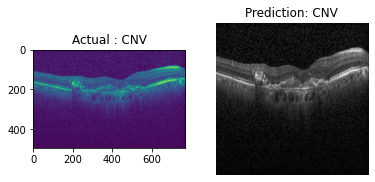

In [29]:
file_name1="../input/kermany2018/OCT2017 /train/CNV/CNV-1016042-10.jpeg"
pred_and_plot(model,file_name1,"CNV",class_names)

[[2.1102546e-04 1.1006845e-02 1.0006751e-02 9.7877538e-01]] tf.Tensor([3], shape=(1,), dtype=int64)


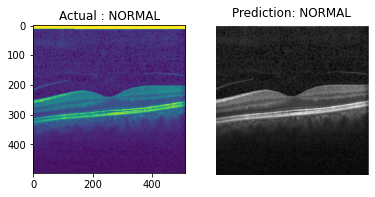

In [30]:
file_name2="../input/kermany2018/OCT2017 /val/NORMAL/NORMAL-4872585-1.jpeg"
pred_and_plot(model,file_name2,"NORMAL",class_names)

[[1.2813983e-03 9.9822980e-01 4.3824184e-05 4.4505336e-04]] tf.Tensor([1], shape=(1,), dtype=int64)


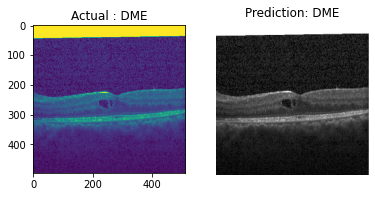

In [31]:
file_name3="../input/kermany2018/OCT2017 /val/DME/DME-9721607-1.jpeg"
pred_and_plot(model,file_name3,"DME",class_names)

[[3.5678454e-06 1.0137968e-07 9.9999607e-01 1.9521627e-07]] tf.Tensor([2], shape=(1,), dtype=int64)


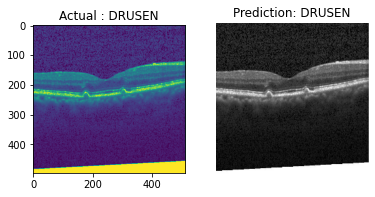

In [32]:
file_name4="../input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9837663-1.jpeg"
pred_and_plot(model,file_name4,"DRUSEN",class_names)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes,target_names=class_names))

              precision    recall  f1-score   support

         CNV       0.95      0.85      0.90      3000
         DME       0.95      0.93      0.94      3000
      DRUSEN       0.87      0.93      0.90      3000
      NORMAL       0.91      0.96      0.94      3000

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_labels, pred_classes)
accuracy_score(y_labels, pred_classes, normalize=False)

11004

In [35]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_labels)==l,
                                                      np.array(pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_labels,pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.917000


In [37]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
0,0,0.986000,0.845667
1,1,0.982111,0.925667
2,2,0.952222,0.933000
3,3,0.969000,0.963667


In [ ]:
#model.fit(X, y)
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)